<a href="https://colab.research.google.com/github/Axel3D2Y/MACHINE-LEARNING-MODELS-USING-SCIKIT-LEARN/blob/main/Clasificaci%C3%B3n_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")


100%|██████████| 8.91k/8.91k [00:00<00:00, 13.4MB/s]

Extracting files...


In [ ]:
data= pd.read_csv(path+ "/diabetes.csv")

# ANALISIS EXPLORATORIO

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Notemos que todos los datos son del tipo entero y que no hay datos nulos


In [ ]:
data['Outcome'].value_counts() #el data set esta un poco desvalanceado


,count
Outcome,
0,500
1,268


In [ ]:
# data.isnull().sum() #n0 hay datos nulos

In [ ]:
# matriz de correlaciones
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


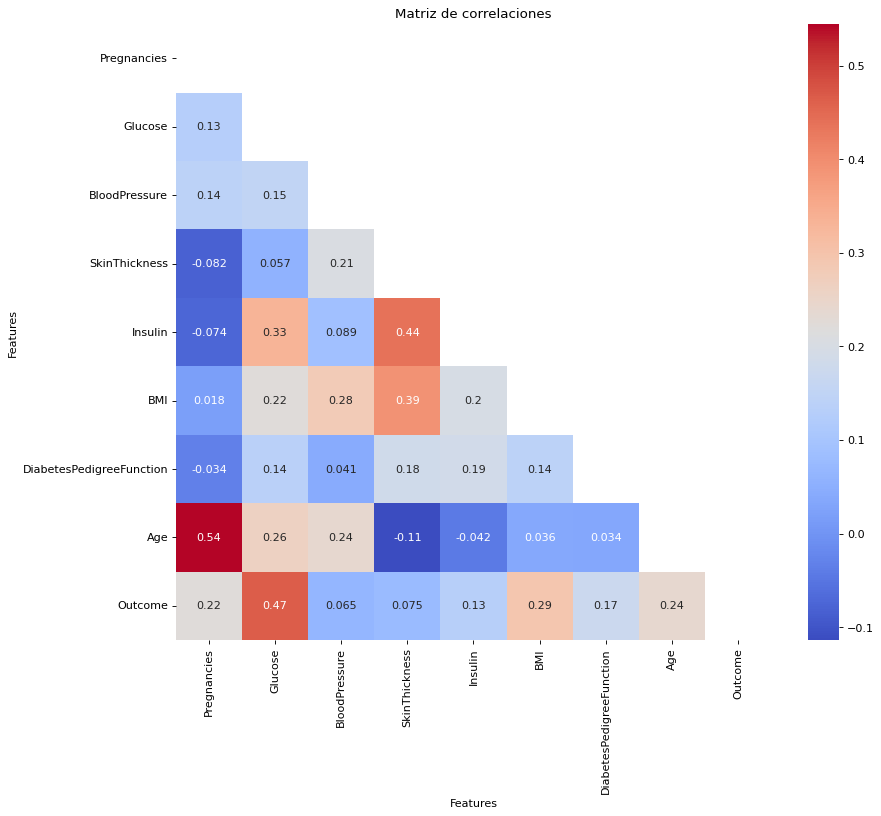

In [ ]:
plt.figure(figsize=(12,10), facecolor='White', edgecolor='black',dpi=80)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Matriz de correlaciones')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Notemos que entre mayor sea el nivel de glucosa en mayor es la probabilidad de tener diabetes

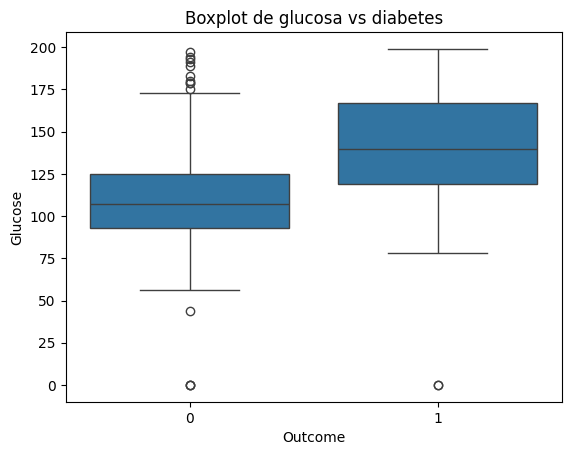

In [ ]:
#buscando valores atipicos entre la cantidad de glucosa y la diabetes
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Boxplot de glucosa vs diabetes')
plt.show()

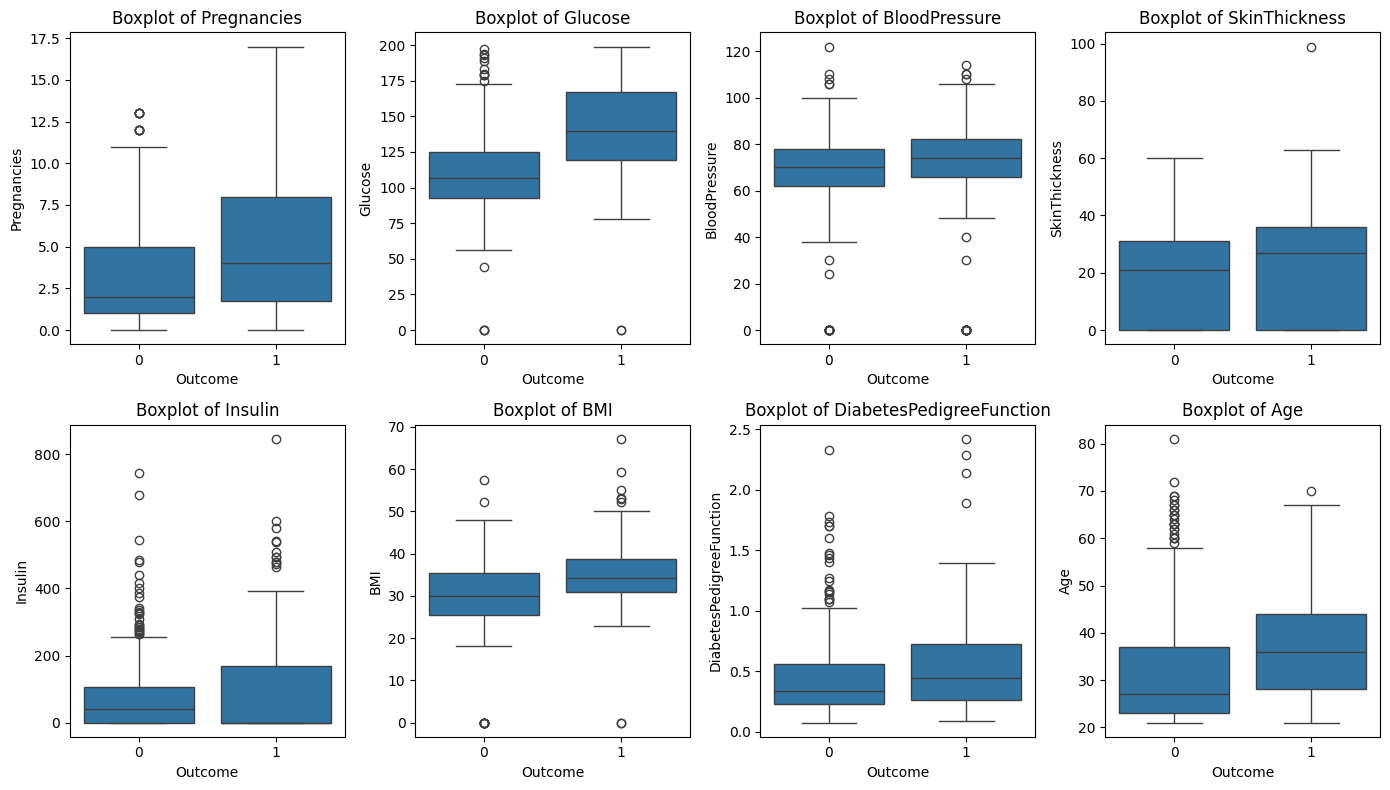

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(14, 8))

axes = axes.flatten() #aplana el vector para que sea mas facil

# Iterar sobre las columnas de datos y los ejes
for i, col in enumerate(data.columns[:8]):  # Excluye la columna 'Outcome' del bucle
    sns.boxplot(x='Outcome', y=col, data=data, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")  # Títulos para cada gráfico

# # Eliminar ejes vacíos si hay menos columnas que subgráficos
# for j in range(i + 1, len(axes)): #en donde acaba i (en nuestro caso en 8 empieza ahi y elimina los subgraficos hasta donde creamos los subgraficos con plt.subplots)
#         fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Pre procesamiento de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

In [ ]:
X_test.shape , X_train.shape, y_train.shape, y_test.shape

((154, 8), (614, 8), (614,), (154,))

In [ ]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

# Entrenamiento de los modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import classification_report

# Regresión logistica

In [ ]:
model_log=LogisticRegression(penalty='l2', tol=0.0001)
history_log=model_log.fit(X_train_scaled,y_train)

In [ ]:
y_train_predict_log=model_log.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,y_train_predict_log))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



La puntuación del clasificador para los datos de entrenamiento
es de un 77% con posibles mejoras, cambiando la funcion de penalización

In [ ]:
y_test_predict_log= model_log.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_test_predict_log))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



El accuracy del clasificador para los datos de prueba es del 79% pero podriamos tener mejores puntuaciones con otro clasificador o haciendo una busqueda por reticula *search griv* y con *cross validation*

# K-NEAREST NEIGHBOR

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=2)
history_knn=model_knn.fit(X_train_scaled,y_train)

In [ ]:
y_train_predict_knn=model_knn.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       401
           1       1.00      0.57      0.73       213

    accuracy                           0.85       614
   macro avg       0.91      0.79      0.81       614
weighted avg       0.88      0.85      0.84       614



para los datos de entrenamiento en knn se alcanzo una precision del 85% que se puede mejorar mediante grid search

In [ ]:
y_test_predict_knn=model_knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        99
           1       0.42      0.20      0.27        55

    accuracy                           0.62       154
   macro avg       0.54      0.52      0.51       154
weighted avg       0.57      0.62      0.57       154



Para los datos de prueba solo se alcanzo una presición del 62%

# MAQUINAS DE SOPORTE VECTORIAL

In [ ]:
model_svm=SVC(kernel='linear', C=1)
history_svm = model_svm.fit(X_train_scaled, y_train)

In [ ]:
y_train_predict_svm= model_svm.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,y_train_predict_svm))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       401
           1       0.72      0.55      0.63       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [ ]:
y_test_predict_svm= model_svm.predict(X_test_scaled)

la precision para el svm es de 77% para los datos de entrenamiento  

In [ ]:
print(classification_report(y_test,y_test_predict_svm))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



por otra parte la precision para los datos de prueba subio al 78%

# ARBOLES DE DECISION

In [ ]:
model_dtc= DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)
history_dtc=model_dtc.fit(X_train_scaled,y_train)

In [ ]:
y_train_predict_dtc=model_dtc.predict(X_train_scaled)

In [ ]:
print(f'numero de niveles; {model_dtc.get_n_leaves()}')
print(f'nivel de profundidad: {model_dtc.get_depth()}')
print(f'nivel de importancia de las caracteristicas: {model_dtc.feature_importances_}')


numero de niveles; 104
nivel de profundidad: 13
nivel de importancia de las caracteristicas: [0.04832462 0.33206133 0.12898871 0.07234968 0.04355845 0.16944695
 0.10103604 0.10423421]


In [ ]:
y_train_predict_dtc=model_dtc.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,y_train_predict_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [ ]:
y_test_predict_dtc=model_dtc.predict(X_test_scaled)
print(classification_report(y_test,y_test_predict_dtc))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



# RANDOM FOREST

In [ ]:
model_rfc=RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1)

In [ ]:
history_rfc = model_rfc.fit(X_train_scaled,y_train)

In [ ]:
y_train_predict_rfc = model_rfc.predict(X_train_scaled)
print(classification_report(y_train,y_train_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [ ]:
model_rfc.feature_importances_

array([0.07287623, 0.25144982, 0.08902653, 0.07171506, 0.07021466,
       0.16981497, 0.11910381, 0.15579892])

In [ ]:
y_test_predict_rfc = model_rfc.predict(X_test_scaled)
print(classification_report(y_test,y_test_predict_rfc))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



# Naiver Bayes

In [ ]:
model_nb=GaussianNB(
    var_smoothing=1e-09,
)
history_nb=model_nb.fit(X_train_scaled,y_train)

In [ ]:
y_train_predict_nb= model_nb.predict(X_train_scaled)
print(classification_report(y_train,y_train_predict_nb))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       401
           1       0.66      0.58      0.62       213

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614



In [ ]:
y_test_predict_nb = model_nb.predict(X_test_scaled)
print(classification_report(y_test,y_test_predict_nb))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

